In [36]:
import shap
import xgboost
from sklearn.model_selection import train_test_split

# Load the Adult dataset
X, y = shap.datasets.adult()
# Since target values were True and False, I converted them to 0 and 1's
y = y.astype(int)   

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a model
# model = RandomForestClassifier()
model = xgboost.XGBClassifier(objective='binary:logistic', n_estimators=10)

# Train the model on the training data
model.fit(X_train, y_train)

# Explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Subsample the test set using the shap.sample function
# X_test_subsample = shap.sample(X_test, nsamples=500)

# Compute SHAP values for the subsampled test set
# shap_values = explainer.shap_values(X_test_subsample)




ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [2]:
display(X.head(10))
display(y)

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5
5,37.0,4,14.0,2,4,5,4,0,0.0,0.0,40.0,39
6,49.0,4,5.0,3,8,0,2,0,0.0,0.0,16.0,23
7,52.0,6,9.0,2,4,4,4,1,0.0,0.0,45.0,39
8,31.0,4,14.0,4,10,0,4,0,14084.0,0.0,50.0,39
9,42.0,4,13.0,2,4,4,4,1,5178.0,0.0,40.0,39


array([0, 0, 0, ..., 0, 0, 1])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


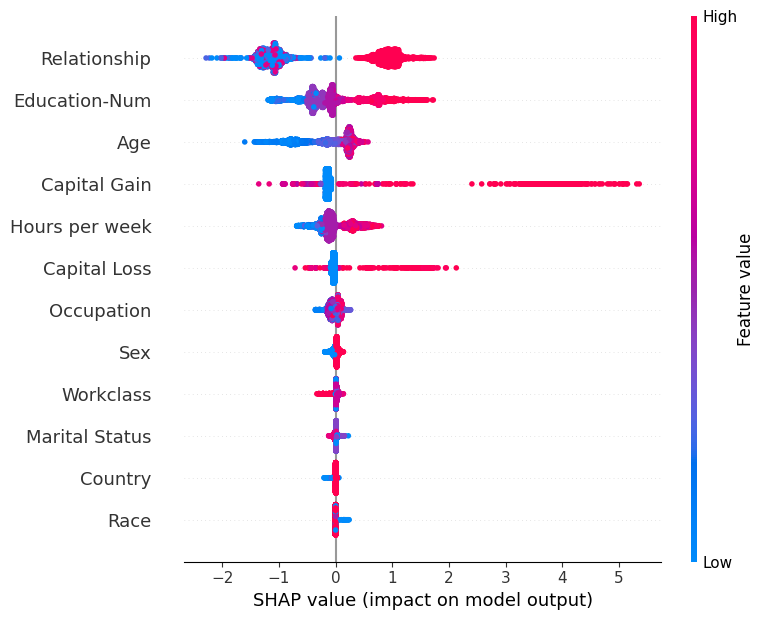

In [38]:
shap.summary_plot(shap_values, X_test)

In [45]:
# initalize JavaScript for visualizatiom
shap.initjs()
# Select a specific index
start_index = 5
end_index = 6
# Reconstruct the explainer for the selected index
exp = shap.TreeExplainer(model)
s_v = exp.shap_values(X_test[start_index:end_index])
shap.plots.force(explainer.expected_value, shap_values[5], X_test[start_index:end_index])

[1]


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


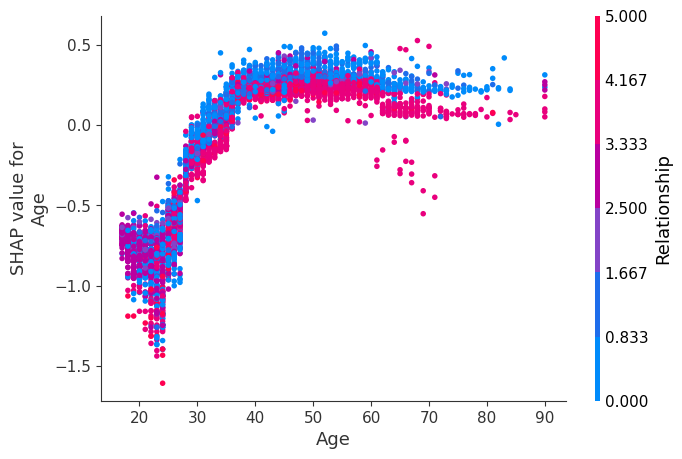

In [6]:
shap.dependence_plot('Age', shap_values, X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


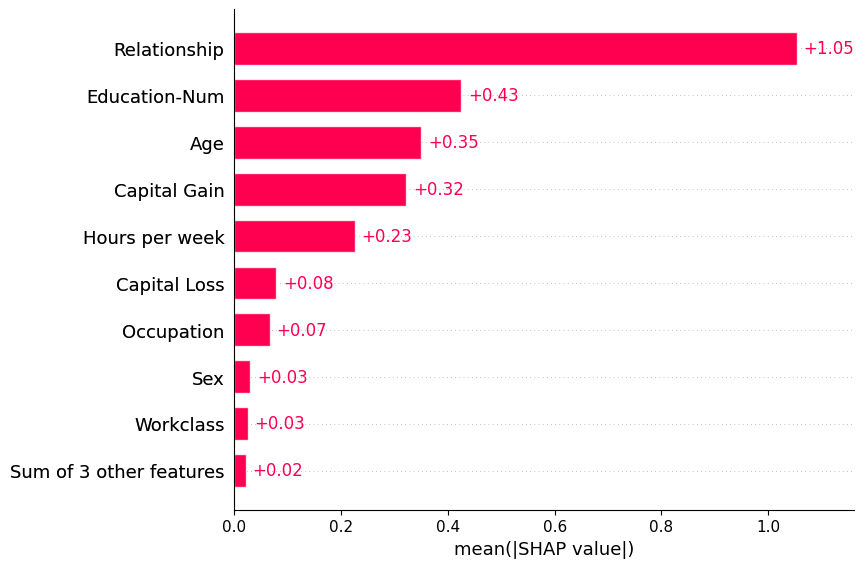

In [7]:
shap.plots.bar(explainer(X_test))